In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [31]:
loan_default = pd.read_csv('Loan_default.csv')

In [87]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [33]:
# Summary statistics for numerical columns
summary_stats = loan_default.describe()
print(loan_default.describe().to_latex())

# Number of unique values in each column
unique_counts = loan_default.nunique()

# Count of missing values in each column
missing_counts = loan_default.isnull().sum()

# Display these statistics
print("Summary Statistics:\n", summary_stats)
print("\nNumber of Unique Values:\n", unique_counts)
print("\nMissing Value Counts:\n", missing_counts)

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Age & Income & LoanAmount & CreditScore & MonthsEmployed & NumCreditLines & InterestRate & LoanTerm & DTIRatio & Default \\
\midrule
count & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 & 255347.000000 \\
mean & 43.498306 & 82499.304597 & 127578.865512 & 574.264346 & 59.541976 & 2.501036 & 13.492773 & 36.025894 & 0.500212 & 0.116128 \\
std & 14.990258 & 38963.013729 & 70840.706142 & 158.903867 & 34.643376 & 1.117018 & 6.636443 & 16.969330 & 0.230917 & 0.320379 \\
min & 18.000000 & 15000.000000 & 5000.000000 & 300.000000 & 0.000000 & 1.000000 & 2.000000 & 12.000000 & 0.100000 & 0.000000 \\
25% & 31.000000 & 48825.500000 & 66156.000000 & 437.000000 & 30.000000 & 2.000000 & 7.770000 & 24.000000 & 0.300000 & 0.000000 \\
50% & 43.000000 & 82466.000000 & 127556.000000 & 574.000000 & 60.000000 & 2.000000 & 13.460000 & 36.000000 & 0.500000 & 0.000000 \\
75% 

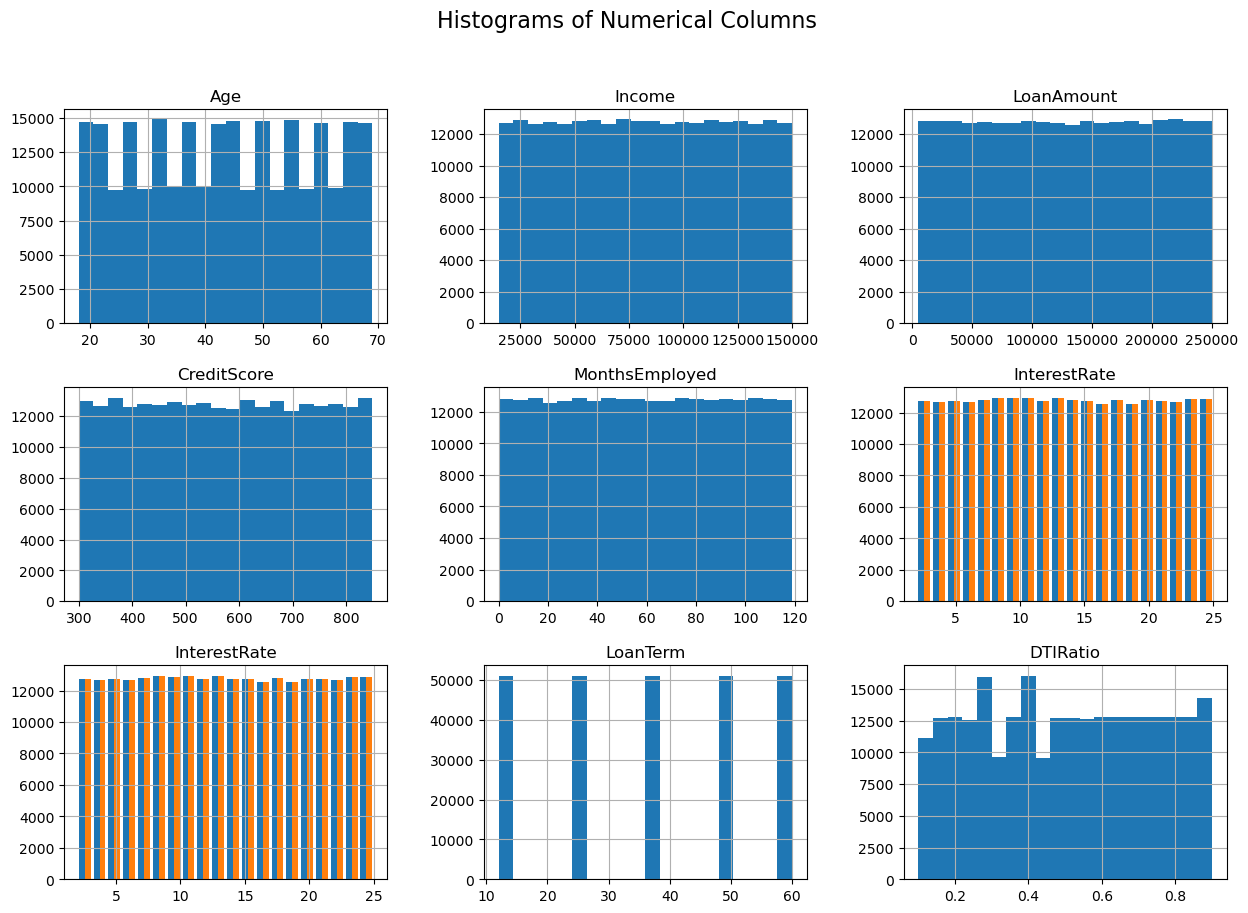

<Figure size 640x480 with 0 Axes>

In [107]:
# Create histograms for numerical columns
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate',
                      'InterestRate', 'LoanTerm', 'DTIRatio']
loan_default[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

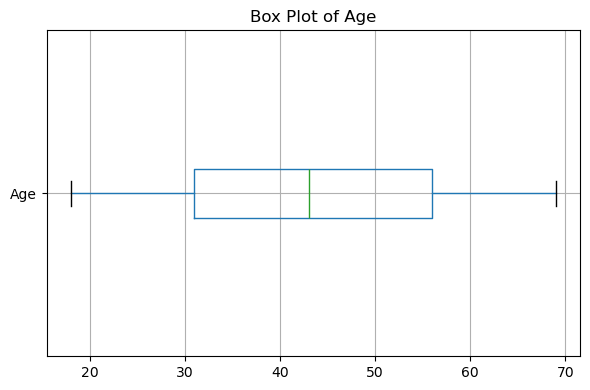

<Figure size 640x480 with 0 Axes>

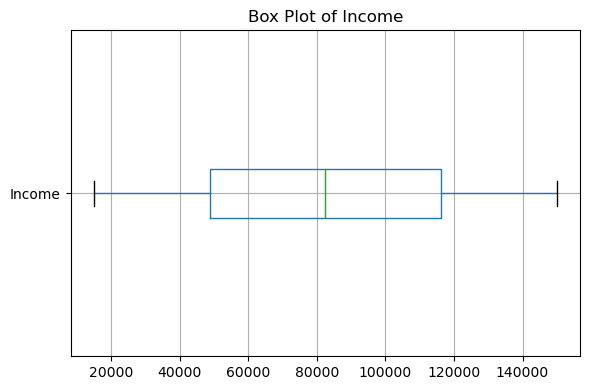

<Figure size 640x480 with 0 Axes>

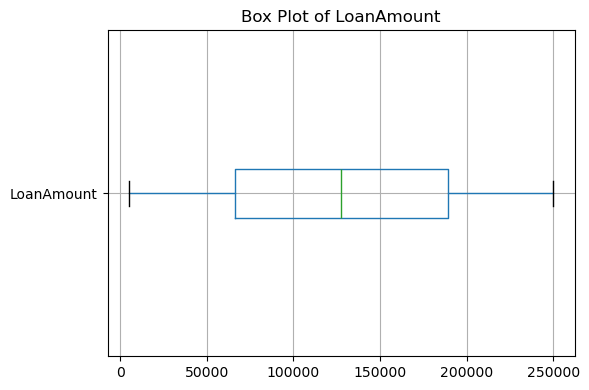

<Figure size 640x480 with 0 Axes>

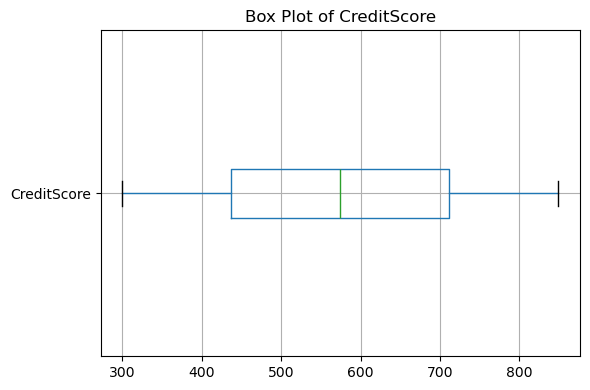

<Figure size 640x480 with 0 Axes>

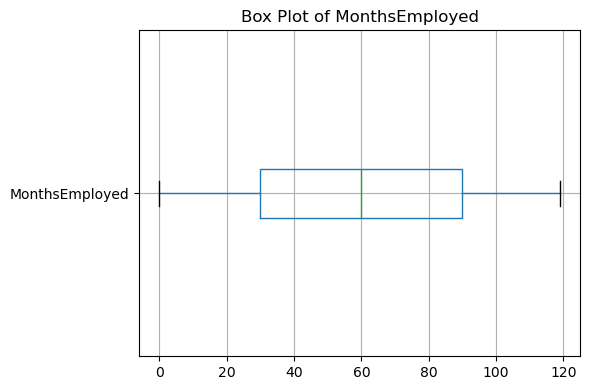

<Figure size 640x480 with 0 Axes>

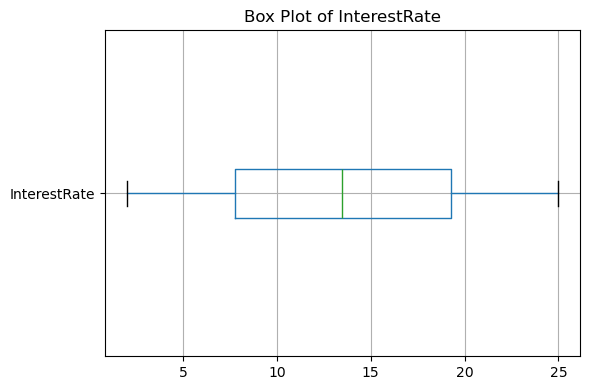

<Figure size 640x480 with 0 Axes>

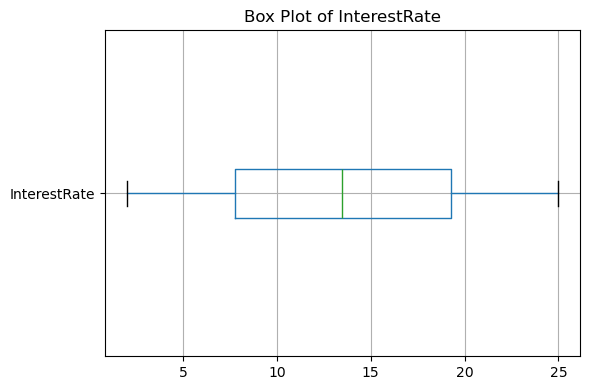

<Figure size 640x480 with 0 Axes>

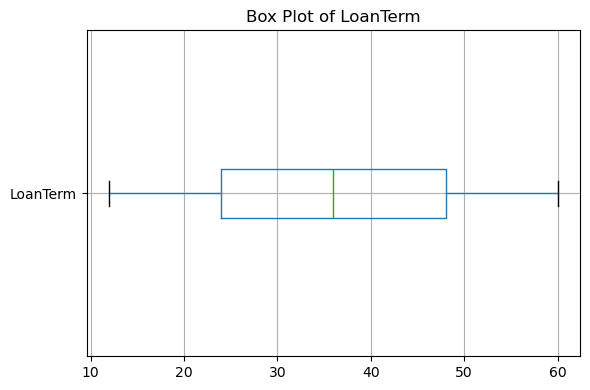

<Figure size 640x480 with 0 Axes>

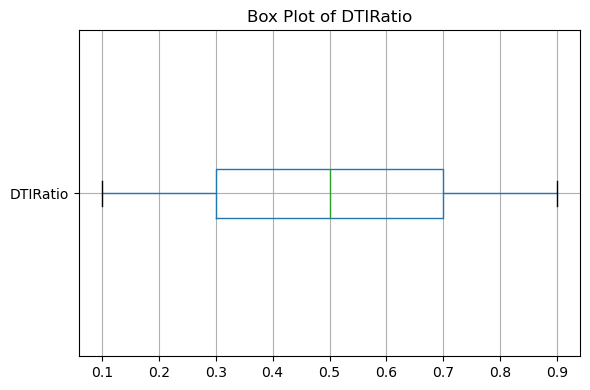

<Figure size 640x480 with 0 Axes>

In [92]:
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate',
                      'InterestRate', 'LoanTerm', 'DTIRatio']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
    loan_default.boxplot(column=col, vert=False)
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.tight_layout()
    plt.show()

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

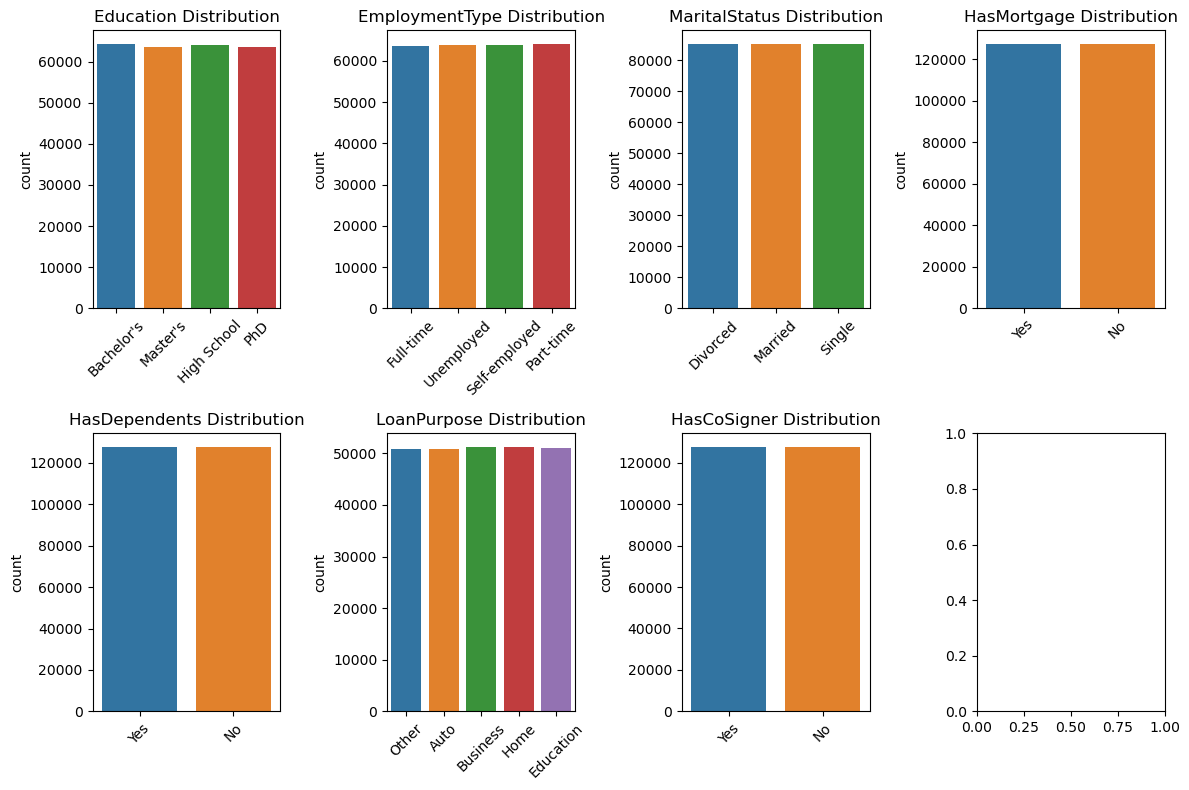

<Figure size 640x480 with 0 Axes>

In [94]:
# Extracting categorical columns excluding 'LoanID'
categorical_columns = loan_default.select_dtypes(include='object')

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Plotting count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=loan_default, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel("")  # Remove x-axis label for better layout
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjusting layout
plt.tight_layout()
plt.show()
# Save the plot as an SVG file
plt.savefig("CategoricalVaraibles", format="svg")

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

AttributeError: 'numpy.int64' object has no attribute 'startswith'

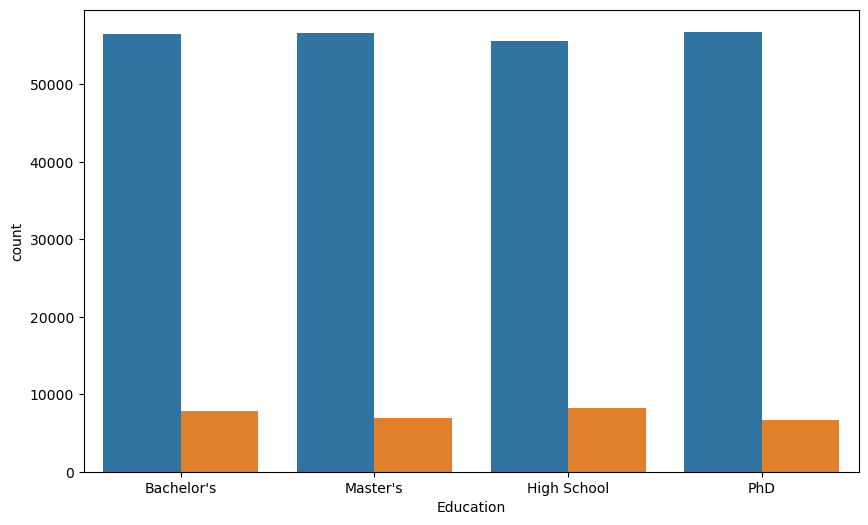

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_default, x='Education', hue='Default')
plt.title('Default Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

AttributeError: 'numpy.int64' object has no attribute 'startswith'

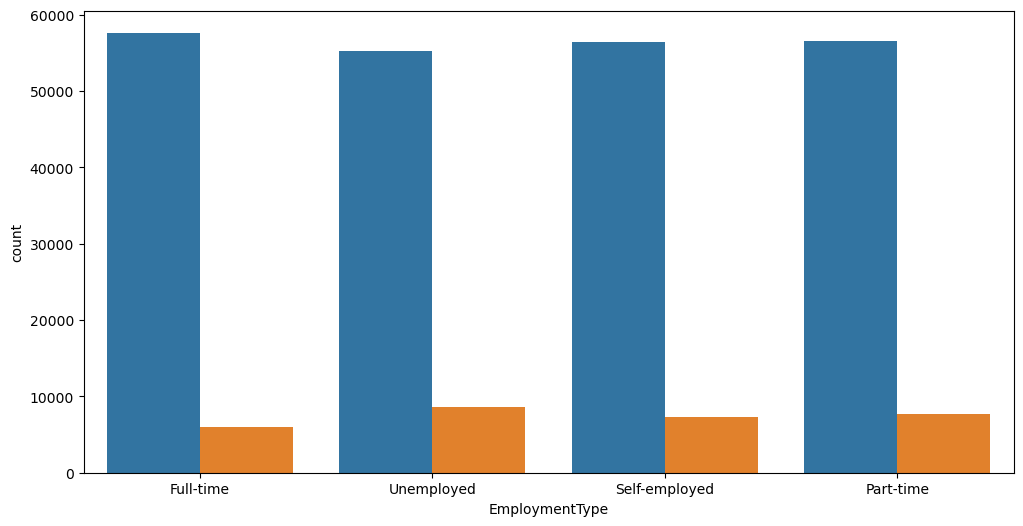

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_default, x='EmploymentType', hue='Default')
plt.title('Default Status by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

In [90]:
sns.pairplot(loan_default, vars=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed'], hue='Default')
plt.suptitle('Pairplot of Numeric Variables by Default Status', y=1.02)
plt.show()

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000227F4E67010> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [37]:
from sklearn.model_selection import train_test_split

# Drop the 'LoanID' column it is not needed for modeling
loan_default = loan_default.drop('LoanID', axis=1)

# Extract features (X) and target variable (y)
X = loan_default.drop('Default', axis=1)
y = loan_default['Default']

# Split the data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (178742, 16) (178742,)
Validation set shape: (76605, 16) (76605,)


In [38]:
numeric_columns = loan_default.select_dtypes(include=['int64', 'float64']).columns
numeric_data = loan_default[numeric_columns]

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

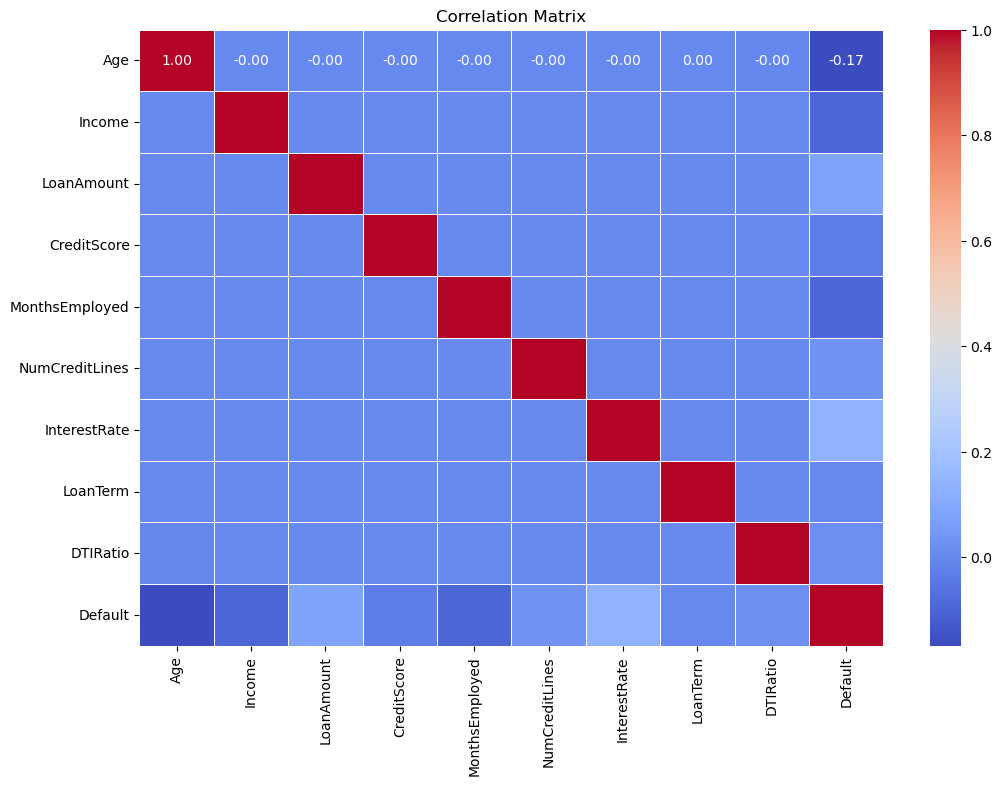

<Figure size 640x480 with 0 Axes>

In [95]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
# Save the plot as an SVG file
plt.savefig("Correlations.svg", format="svg")

# Decision Tree

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
# Separate features (X) and target variable (y)
X = loan_default.drop(['Default'], axis=1)  # Remove 'LoanID' from the drop list
y = loan_default['Default']

# One-hot encode categorical columns if needed
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [100]:
# Predict on the test set
y_pred = model.predict(X_test)

In [102]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['Not Default', 'Default'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

KeyboardInterrupt: 

In [44]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Check confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Check classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 80.25%
Confusion Matrix:
[[59373  8308]
 [ 6825  2099]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67681
           1       0.20      0.24      0.22      8924

    accuracy                           0.80     76605
   macro avg       0.55      0.56      0.55     76605
weighted avg       0.82      0.80      0.81     76605



# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [48]:
# Check accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2%}")

# Check confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Check classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)

Accuracy: 88.57%
Confusion Matrix:
[[67565   116]
 [ 8642   282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.71      0.03      0.06      8924

    accuracy                           0.89     76605
   macro avg       0.80      0.51      0.50     76605
weighted avg       0.87      0.89      0.84     76605



# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [50]:
# Standardize the features for KNN (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [52]:
# Predict on the scaled test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [53]:
# Check accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2%}")

# Check confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Check classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(class_report_knn)

Accuracy: 87.47%
Confusion Matrix:
[[66639  1042]
 [ 8553   371]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67681
           1       0.26      0.04      0.07      8924

    accuracy                           0.87     76605
   macro avg       0.57      0.51      0.50     76605
weighted avg       0.81      0.87      0.83     76605



# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the scaled training set
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [56]:
# Predict on the scaled test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

In [57]:
# Check accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.2%}")

# Check confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(conf_matrix_logreg)

# Check classification report
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report:")
print(class_report_logreg)

Accuracy: 88.50%
Confusion Matrix:
[[67492   189]
 [ 8617   307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.62      0.03      0.07      8924

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.50     76605
weighted avg       0.86      0.89      0.84     76605



#### Assumptions:

# Gradient Boosting: XGBoost

In [58]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [103]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBoost Accuracy: 0.8864891325631487


In [60]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm}')

LightGBM Accuracy: 0.8865739834214477


In [61]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train, verbose=False)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {accuracy_catboost}')

CatBoost Accuracy: 0.8859996083806541


# Neural Nets

In [72]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [65]:
# Drop LoanID if it's not contributing to predictions
X = loan_default.drop(['Default'], axis=1)
y = loan_default['Default']

# Perform one-hot encoding for categorical variables if needed
X = pd.get_dummies(X)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [66]:
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3228 - accuracy: 0.8831 - val_loss: 0.3131 - val_accuracy: 0.8873
Epoch 2/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3166 - accuracy: 0.8847 - val_loss: 0.3120 - val_accuracy: 0.8871
Epoch 3/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3152 - accuracy: 0.8850 - val_loss: 0.3104 - val_accuracy: 0.8881
Epoch 4/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3144 - accuracy: 0.8855 - val_loss: 0.3117 - val_accuracy: 0.8875
Epoch 5/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3138 - accuracy: 0.8856 - val_loss: 0.3109 - val_accuracy: 0.8878
Epoch 6/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3132 - accuracy: 0.8861 - val_loss: 0.3120 - val_accuracy: 0.8859
Epoch 7/10
5107/5107 [==============================] - 6s 1ms/step - loss: 0.3128 - accuracy: 0.8859 - val_loss: 0.3115 - val_accuracy:

In [67]:
# Make predictions on the test set
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Evaluate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn}')

1596/1596 [==============================] - 1s 671us/step
Neural Network Accuracy: 0.8864303896612493


In [75]:
# Define ranges of parameters to loop through
hidden_layers_range = [2, 3, 4]
units_range = [32, 64, 128]
dropout_rate_range = [0.3, 0.5, 0.7]

best_accuracy = 0.0
best_params = None

# Create an empty list to store results
nn_results = []

def build_neural_network(input_shape, num_hidden_layers, num_units, dropout_rate):
    model = Sequential()
    model.add(Dense(num_units, input_shape=(input_shape,), activation='relu'))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    return model

# Nested loop to iterate through possibilities
for num_hidden_layers in hidden_layers_range:
    for num_units in units_range:
        for dropout_rate in dropout_rate_range:
            # Build the neural network
            model = build_neural_network(input_shape=X_train.shape[1], 
                                         num_hidden_layers=num_hidden_layers, 
                                         num_units=num_units, 
                                         dropout_rate=dropout_rate)

            # Compile the model
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

            # Evaluate the model on the test set
            _, accuracy = model.evaluate(X_test, y_test)

            # Append the results to the list
            nn_results.append({
                'NumHiddenLayers': num_hidden_layers,
                'NumUnits': num_units,
                'DropoutRate': dropout_rate,
                'Accuracy': accuracy  # Replace with the actual accuracy variable
            })

            print(f'Hidden Layers: {num_hidden_layers}, Units: {num_units}, Dropout Rate: {dropout_rate}, Accuracy: {accuracy}')

            # Update the best parameters if the current model is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (num_hidden_layers, num_units, dropout_rate)

print(f'Best Parameters: Hidden Layers={best_params[0]}, Units={best_params[1]}, Dropout Rate={best_params[2]}, Accuracy={best_accuracy}')

# Create a DataFrame from the list of results
nn_results_df = pd.DataFrame(nn_results)
print(nn_results_df)

Epoch 1/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3301 - accuracy: 0.8828 - val_loss: 0.3141 - val_accuracy: 0.8863
Epoch 2/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3191 - accuracy: 0.8850 - val_loss: 0.3145 - val_accuracy: 0.8867
Epoch 3/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3168 - accuracy: 0.8851 - val_loss: 0.3118 - val_accuracy: 0.8871
Epoch 4/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3157 - accuracy: 0.8854 - val_loss: 0.3112 - val_accuracy: 0.8877
Epoch 5/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3153 - accuracy: 0.8853 - val_loss: 0.3105 - val_accuracy: 0.8875
Epoch 6/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3148 - accuracy: 0.8857 - val_loss: 0.3112 - val_accuracy: 0.8877
Epoch 7/10
6384/6384 [==============================] - 7s 1ms/step - loss: 0.3146 - accuracy: 0.8856 - val_loss: 0.3119 - val_accuracy:

##### CNN

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

In [78]:
# Reshape your input data for CNN
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build a simple CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)[1]
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/10
6384/6384 [==============================] - 42s 7ms/step - loss: 0.3184 - accuracy: 0.8837 - val_loss: 0.3108 - val_accuracy: 0.8845
Epoch 2/10
6384/6384 [==============================] - 44s 7ms/step - loss: 0.3153 - accuracy: 0.8849 - val_loss: 0.3130 - val_accuracy: 0.8865
Epoch 3/10
6384/6384 [==============================] - 45s 7ms/step - loss: 0.3146 - accuracy: 0.8860 - val_loss: 0.3114 - val_accuracy: 0.8875
Epoch 4/10
6384/6384 [==============================] - 40s 6ms/step - loss: 0.3141 - accuracy: 0.8859 - val_loss: 0.3106 - val_accuracy: 0.8872
Epoch 5/10
6384/6384 [==============================] - 28s 4ms/step - loss: 0.3138 - accuracy: 0.8860 - val_loss: 0.3110 - val_accuracy: 0.8876
Epoch 6/10
6384/6384 [==============================] - 49s 8ms/step - loss: 0.3137 - accuracy: 0.8862 - val_loss: 0.3127 - val_accuracy: 0.8875
Epoch 7/10
6384/6384 [==============================] - 47s 7ms/step - loss: 0.3133 - accuracy: 0.8861 - val_loss: 0.3120 - val_ac

##### RNN

In [82]:
from keras.layers import Dense, SimpleRNN

In [83]:
# Reshape your input data for RNN
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build a simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=32, activation='relu', input_shape=(1, X_train.shape[1])))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
rnn_accuracy = rnn_model.evaluate(X_test_reshaped, y_test)[1]
print("RNN Accuracy:", rnn_accuracy)

Epoch 1/10
6384/6384 [==============================] - 9s 1ms/step - loss: 0.3228 - accuracy: 0.8834 - val_loss: 0.3140 - val_accuracy: 0.8858
Epoch 2/10
6384/6384 [==============================] - 8s 1ms/step - loss: 0.3161 - accuracy: 0.8852 - val_loss: 0.3131 - val_accuracy: 0.8868
Epoch 3/10
6384/6384 [==============================] - 8s 1ms/step - loss: 0.3145 - accuracy: 0.8856 - val_loss: 0.3120 - val_accuracy: 0.8874
Epoch 4/10
6384/6384 [==============================] - 8s 1ms/step - loss: 0.3139 - accuracy: 0.8859 - val_loss: 0.3129 - val_accuracy: 0.8861
Epoch 5/10
6384/6384 [==============================] - 8s 1ms/step - loss: 0.3134 - accuracy: 0.8859 - val_loss: 0.3113 - val_accuracy: 0.8875
Epoch 6/10
6384/6384 [==============================] - 8s 1ms/step - loss: 0.3129 - accuracy: 0.8863 - val_loss: 0.3110 - val_accuracy: 0.8873
Epoch 7/10
6384/6384 [==============================] - 8s 1ms/step - loss: 0.3126 - accuracy: 0.8862 - val_loss: 0.3117 - val_accuracy:

##### Adaboost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an AdaBoostClassifier with a DecisionTree base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, adaboost_predictions))
print("\nClassification Report:")
print(classification_report(y_test, adaboost_predictions))

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.8866066183669473
Confusion Matrix:
[[44782   388]
 [ 5403   497]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.56      0.08      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.73      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070



##### Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a BaggingClassifier with a RandomForest base estimator
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the Bagging model
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Accuracy:", bagging_accuracy)

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, bagging_predictions))
print("\nClassification Report:")
print(classification_report(y_test, bagging_predictions))

c:\Users\chris\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8862345799882514
Confusion Matrix:
[[45125    45]
 [ 5765   135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.75      0.02      0.04      5900

    accuracy                           0.89     51070
   macro avg       0.82      0.51      0.49     51070
weighted avg       0.87      0.89      0.84     51070

